<a href="https://colab.research.google.com/github/peddlem25/FreshNewTs-Fashion-MNIST/blob/master/Fresh_New_T's_using_Fashion_Mnist_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.activations import relu, tanh
from tensorflow.keras.layers import Dropout, Dense, Flatten, BatchNormalization, Conv2D, Activation, Conv2DTranspose, Input, Reshape

In [0]:
data_set = tf.keras.datasets.fashion_mnist
(x_train, _), (x_test, _) = data_set.load_data()

In [0]:
x_train = np.array(x_train).reshape(-1, 28, 28, 1)
x_test = np.array(x_test).reshape(-1, 28, 28, 1)

In [0]:
x_train = np.array(x_train).astype(np.float32)
x_test = np.array(x_test).astype(np.float32)

In [0]:
def Discriminator():

  model = Sequential()

  model.add(Flatten(input_shape=x_train.shape[1:]))
  model.add(Dense(512, activation="relu"))
  model.add(Dense(256, activation="relu"))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=x_train.shape[1:])
  validity = model(img)

  return Model(img, validity)
  

In [10]:
discriminator = Discriminator()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [0]:
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])

In [0]:
def generator():

  model = Sequential()

  model.add(Dense(256, input_dim=100, activation="relu"))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(512, activation="relu"))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(1024, activation="relu"))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(np.prod((28,28)), activation='tanh'))
  model.add(Reshape((28,28,1)))

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)
  

In [0]:
generator = generator()

In [0]:
noise = Input(shape=(100,))
img = generator(noise)
discriminator.trainable = False
validity = discriminator(img)
combined = Model(noise, validity)
combined.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))

In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
def train_gan(epochs, batch_size):
  valid = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))
  for i in range(epochs):
    noise = np.random.normal(0, 1, (batch_size, 100))
    noise = noise.astype(np.float32)
    gen_imgs = generator.predict(noise)

    idx = np.random.randint(0, x_train.shape[0], batch_size)
    imgs = x_train[idx]

    d_loss_real = discriminator.train_on_batch(imgs, valid)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = combined.train_on_batch(noise, valid)

    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (i+1, d_loss[0], 100*d_loss[1], g_loss))

In [19]:
train_gan(30000, 128)

1 [D loss: 0.724605, acc.: 39.84%] [G loss: 0.544568]
2 [D loss: 0.541410, acc.: 80.86%] [G loss: 0.505611]
3 [D loss: 0.488418, acc.: 67.58%] [G loss: 0.524584]
4 [D loss: 0.460040, acc.: 63.67%] [G loss: 0.597605]
5 [D loss: 0.413074, acc.: 78.52%] [G loss: 0.685149]
6 [D loss: 0.409339, acc.: 84.38%] [G loss: 0.790500]
7 [D loss: 0.316992, acc.: 96.48%] [G loss: 0.966949]
8 [D loss: 0.260818, acc.: 99.61%] [G loss: 1.110611]
9 [D loss: 0.214714, acc.: 100.00%] [G loss: 1.274248]
10 [D loss: 0.189033, acc.: 100.00%] [G loss: 1.431895]
11 [D loss: 0.161285, acc.: 100.00%] [G loss: 1.658881]
12 [D loss: 0.148387, acc.: 100.00%] [G loss: 1.719180]
13 [D loss: 0.131458, acc.: 100.00%] [G loss: 1.924489]
14 [D loss: 0.114137, acc.: 100.00%] [G loss: 1.995945]
15 [D loss: 0.120137, acc.: 99.61%] [G loss: 2.165241]
16 [D loss: 0.100119, acc.: 100.00%] [G loss: 2.352358]
17 [D loss: 0.097323, acc.: 100.00%] [G loss: 2.460809]
18 [D loss: 0.093488, acc.: 100.00%] [G loss: 2.526039]
19 [D loss

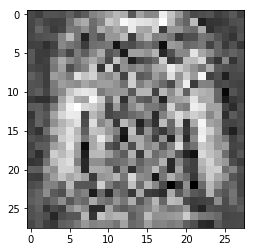

In [24]:
noise = np.random.normal(0, 1, (1, 100))
gen_imgs = generator.predict(noise)
plt.imshow(gen_imgs[0, :,:,0], cmap="gray")

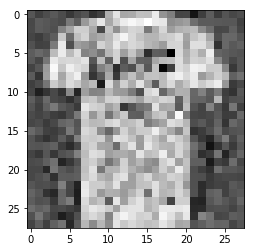

In [23]:
#Fresh NEW T-Shit
noise = np.random.normal(0, 1, (1, 100))
gen_imgs = generator.predict(noise)
plt.imshow(gen_imgs[0, :,:,0], cmap="gray")

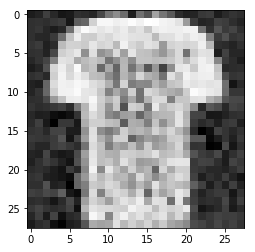

In [26]:
#2 Fresh NEW T-Shirt
noise = np.random.normal(0, 1, (1, 100))
gen_imgs = generator.predict(noise)
plt.imshow(gen_imgs[0, :,:,0], cmap="gray")

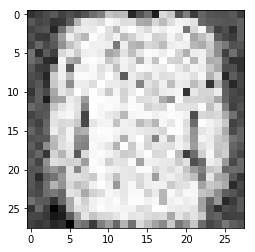

In [29]:
#Fresh NEW Long Sleeve Shirt
noise = np.random.normal(0, 1, (1, 100))
gen_imgs = generator.predict(noise)
plt.imshow(gen_imgs[0, :,:,0], cmap="gray")

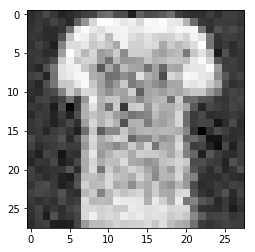

In [30]:
#5 Fresh NEW T-Shirt
noise = np.random.normal(0, 1, (1, 100))
gen_imgs = generator.predict(noise)
plt.imshow(gen_imgs[0, :,:,0], cmap="gray")

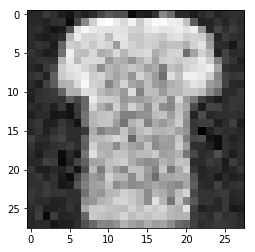

In [33]:
#6 Fresh NEW T-shirt
noise = np.random.normal(0, 1, (1, 100))
gen_imgs = generator.predict(noise)
plt.imshow(gen_imgs[0, :,:,0], cmap="gray")

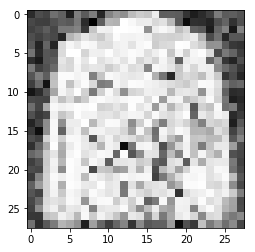

In [37]:
#7 Fresh NEE Long -Sleeve Shirt
noise = np.random.normal(0, 1, (1, 100))
gen_imgs = generator.predict(noise)
plt.imshow(gen_imgs[0, :,:,0], cmap="gray")

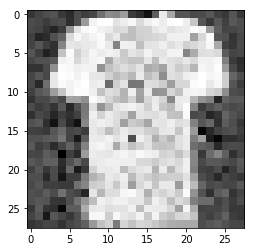

In [38]:
#8 Fresh NEW T-shirt
noise = np.random.normal(0, 1, (1, 100))
gen_imgs = generator.predict(noise)
plt.imshow(gen_imgs[0, :,:,0], cmap="gray")

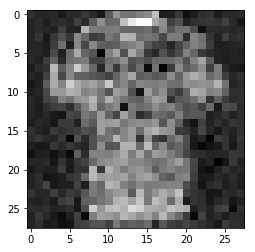

In [42]:
#9 Fresh NEW T-shirt
noise = np.random.normal(0, 1, (1, 100))
gen_imgs = generator.predict(noise)
plt.imshow(gen_imgs[0, :,:,0], cmap="gray")

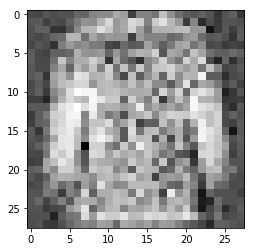

In [44]:
#10 Fresh NEW Long Sleeve Shirt
noise = np.random.normal(0, 1, (1, 100))
gen_imgs = generator.predict(noise)
plt.imshow(gen_imgs[0, :,:,0], cmap="gray")